## PROJET AI2 Bootcamp Module 2
- Auteur : Yannick OREAL
- Date : 27/11/2025

## Code principal extraction de l'API et sauvegarde vers dataframe + exportation fichier CSV

In [ ]:
!pip install pysqlite3

In [151]:
# Yannick Oreal
# 2025-11-27
# AI2 bootcamp - module 2 - project
# Extract/Transform/Visualize data from API https://api.artic.edu

import requests
import csv
import random
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import io
import os
import numpy as np
from IPython.display import display

default_path = os.path.abspath(os.getcwd())

##################################################################################################
# fonction pour récupérer les informations d'une oeuvre
# paramètre
# art_id = numéro id d'une peinture
# retourne un fichier json
def get_artic_edu_artwork_json(art_id):
    # appel api
    url =  "https://api.artic.edu/api/v1/artworks/" + str(art_id) + "?fields=id,title,image_id,artist_title,artist_display,artist_id,dimensions_detail,medium_display,place_of_origin,main_reference_number"
    response = requests.get(url)
    
    # check erreur
    if response.status_code == 200:
        return response.json()['data']
    else:
        #print(f"erreur API : {response.status_code}")
        return None

##################################################################################################
# fonction pour récupérer les informations d'une oeuvre
# paramètre
# art_id = numéro id d'une peinture
# retourne un fichier json
def get_artic_edu_artist_json(artist_id):
    # appel api
    url =  "https://api.artic.edu/api/v1/artists/" + str(artist_id) + "?fields=birth_date,death_date"
    response = requests.get(url)
    
    # check erreur
    if response.status_code == 200:
        return response.json()['data']
    else:
        #print(f"erreur API : {response.status_code}")
        return None

#################################################################################################
# fonction pour afficher les informations d'une oeuvre
# paramètres
# dic = fichier json (data) renvoyé par l'api d'artic.edu.api
# img_save = sauve l'image jpg
# affiche les informations et retourne uniquement l'url de l'image (et si pas d'url la chaine 'no image')
def display_artwork_informations(dic):
    # affiche les attributs de l'oeuvre
    for key in dic:
        if key=='dimensions_detail':
            for dim in dic[key][0]:
                dicbis = dic[key][0]
                print(f"dimension {dim}={dicbis[dim]}")
        else:
            print(f"{key}={dic[key]}")
    
#################################################################################################
# fonction pour récupérer uniquement l'image d'une oeuvre
# paramètres
# image_id = identifiant de l'image à télécharger (entier)
# display_mode = on affiche l'image après le téléchargement (booleen)
# export_mode = on sauvegarde l'image sous forme de jpeg en plus de la retourner en bits (booleen)
def get_artwork_image(image_id,display_mode,export_mode,n):

    # recupere l'image de l'oeuvre
    artwork_url = "https://www.artic.edu/iiif/2/" + str(image_id) + "/full/843,/0/default.jpg"
    response = requests.get(artwork_url)
    # si l'image est récupérable
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        
        # si display_mode alors affiche l'image 
        if display_mode:
            display(img)

        # si export_mode alors sauve l'image sous forme de jpg
        if export_mode:
            # création dossier artworks_img si il n'existe pas
            img_path = os.path.abspath(os.getcwd()) + "\\data_out\\random_artworks_" + str(n) + "_img\\"
            if not os.path.exists(img_path):
                os.makedirs(img_path)
            img.save(img_path + image_id + ".jpg")
            print("export image:",image_id)
 
        # retourne l'image
        return image_to_byte_array(img)

    else:
        # si pas d'image
        return None


#################################################################################################
# fonction pour convertir l'image en bits
# paramètre
# image = objet image (PIL)
def image_to_byte_array(image):
  # BytesIO is a file-like buffer stored in memory
  imgByteArr = io.BytesIO()
  # image.save expects a file-like as a argument
  image.save(imgByteArr, format=image.format)
  # Turn the BytesIO object back into a bytes object
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

    
################################################################################################
# fonction pour récupérer n oeuvres aléatoirement
# paramètres
# n = le nombre d'oeuvres (entier de 1 a 100000)
# csv_save = doit on sauvegarder ou non un fichier csv avec les id/titres/url images (booleen)
# display_mode = on affiche l'image après le téléchargement (booleen)
# export_mode = on sauvegarde l'image sous forme de jpeg en plus de la retourner en bits (booleen)
# verbose_mode = affiche les infos (booleen)
def get_n_random_artwork(n,csv_save,display_mode,export_mode,verbose_mode):
    # initialisation listes
    id_list = []
    title_list = []
    img_url_list = []
    artist_title_list = []
    artist_display_list = []
    artist_id_list = []
    artist_birth_date_list = []
    artist_death_date_list = []
    medium_display_list = []
    place_of_origin_list = []
    img_list = []
    ref_number_list = []

    # boucle pour récuperer n oeuvres
    for i in range(1,n+1):
        # boucle pour générer aléatoirement un id et vérifie si on peut récupérer les infos, sinon recommence
        id_valide = False
        while id_valide == False:
            # genere un entier aléatoire entre 1 et 100000 
            artwork_id = random.randint(1,1000000)
            
            # appel de l'api artic.edu api pour récupérer le json d'une oeuvre
            artwork_information_dic = get_artic_edu_artwork_json(artwork_id)
            
            # si le json est pas null alors on sort de la boucle
            if artwork_information_dic!=None:
                id_valide = True

        # récupération des infos supplémentaires de l'artiste
        artist_add_info = get_artic_edu_artist_json(artwork_information_dic['artist_id'])
        
        # affiche les infos de l'oeuvre
        msg="Extraction API oeuvre " + str(i) + "/" + str(n) 
        print(msg, end='\r')
        if verbose_mode:
            display_artwork_informations(artwork_information_dic)

        # récupère l'image
        return_img = get_artwork_image(artwork_information_dic['image_id'],display_mode,export_mode,n)
        
        # sauvegarde les infos de l'oeuvre (si paramètre csv_save est Vrai)
        id_list.append(str(artwork_information_dic['id']))
        title_list.append(artwork_information_dic['title'])
        artist_title_list.append(artwork_information_dic['artist_title'])
        if artwork_information_dic['artist_display'] is not None:
            artist_display_list.append(artwork_information_dic['artist_display'].replace('\n',''))
        else:
            artist_display_list.append("")
        medium_display_list.append(artwork_information_dic['medium_display'])
        place_of_origin_list.append(artwork_information_dic['place_of_origin'])
        if return_img is None:
            img_url_list.append("no image")
        else:
            img_url_list.append("https://www.artic.edu/iiif/2/" + str(artwork_information_dic['image_id']) + "/full/843,/0/default.jpg")
        img_list.append(return_img)
        ref_number_list.append(artwork_information_dic['main_reference_number'])
        artist_id_list.append(artwork_information_dic['artist_id'])
        if artist_add_info is not None:
            artist_birth_date_list.append(artist_add_info['birth_date'])
            artist_death_date_list.append(artist_add_info['death_date'])
        else:
            artist_birth_date_list.append('Unknow')
            artist_death_date_list.append('Unknow')
    
    # genere le dataframe et le sauve au même niveau que le notebook  (si paramètre csv_save est Vrai)
    df_artworks = pd.DataFrame([id_list,title_list,artist_title_list,artist_display_list,artist_birth_date_list,artist_death_date_list,medium_display_list,place_of_origin_list,img_url_list,img_list,ref_number_list])
    df_artworks = df_artworks.transpose()
    df_artworks.columns = ['id', 'title', 'artist_title','artist_display','birth_date','death_date','medium_display','place_of_origin','img_url','img','ref_number']
    if csv_save:
        df_artworks.to_csv('data_out\\random_artworks_' +str(n) + '.csv', index=False)

    return df_artworks
    

In [19]:
################################################################################################
# appel de la fonction principale
# get_n_random_artwork(n,csv_save,display_mode,export_mode,verbose_mode)
get_n_random_artwork(1000,True,False,False,False)

information oeuvre 1 récupérée
information oeuvre 2 récupérée
information oeuvre 3 récupérée
information oeuvre 4 récupérée
information oeuvre 5 récupérée
information oeuvre 6 récupérée
information oeuvre 7 récupérée
information oeuvre 8 récupérée
information oeuvre 9 récupérée
information oeuvre 10 récupérée
information oeuvre 11 récupérée
information oeuvre 12 récupérée
information oeuvre 13 récupérée
information oeuvre 14 récupérée
information oeuvre 15 récupérée
information oeuvre 16 récupérée
information oeuvre 17 récupérée
information oeuvre 18 récupérée
information oeuvre 19 récupérée
information oeuvre 20 récupérée
information oeuvre 21 récupérée
information oeuvre 22 récupérée
information oeuvre 23 récupérée
information oeuvre 24 récupérée
information oeuvre 25 récupérée
information oeuvre 26 récupérée
information oeuvre 27 récupérée
information oeuvre 28 récupérée
information oeuvre 29 récupérée
information oeuvre 30 récupérée
information oeuvre 31 récupérée
information oeuvr

## Code principal nettoyage et transformation des données / sauvegarde vers dataframe

In [144]:
################################################################################################
# fonction pour nettoyer les données du csv
# paramètres
# df = dataframe

def clean_data(df):
    df = df.loc[(~df['title'].isin(['Untitled']))
                &(~df['img_url'].isin(['no image']))
                &(~df['birth_date'].isin(['Unknow']))
           ]
    df = df.dropna()
    return df

################################################################################################
# fonction pour transformer les données du csv
# paramètres
# df = dataframe
def transform_data(df,with_image):

    # Extraction informations attribut 'medium_display'
    df.loc[:,'medium_display'] = df['medium_display'].str.lower()
    df.loc[:,'medium_display'] = df['medium_display'].str.replace(","," ")

    # ajout attribut 'support_type'
    df.loc[:,'support_type']=''
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("paper|print|printing"),"paper",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("canvas"),"canvas",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("wood"),"wood",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("ceramic"),"ceramic",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("bronze"),"bronze",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("dagueerotype"),"dagueerotype",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['medium_display'].str.contains("porcelain"),"porcelaine",df.loc[:,'support_type'])
    df.loc[:,'support_type']=np.where(df['support_type']=='',"other",df.loc[:,'support_type'])

    # ajout attribut 'type' (type de méthode artistique)
    df.loc[:,'type']=''
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("lithograph"),"lithograph",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("gelatin"),"gelatin",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("oil"),"oil",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("gouache"),"gouache",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("etching"),"etching",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("engraving"),"engraving",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("printing"),"printing",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("graphite"),"graphite",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['medium_display'].str.contains("woodcut"),"woodcut",df.loc[:,'type'])
    df.loc[:,'type']=np.where(df['type']=='',"other",df['type'])

    # Extraction informations attribut 'ref_number'
    df.loc[:,'stock_year']=df['ref_number'].str[:4]
    df = df[df['stock_year'].str.isnumeric()]        
    df.loc[:,'stock_year']=df['stock_year'].astype('int')

    # Extraction attribut 'place_of_origin' + jointure avec dataframe pays
    df_countries = pd.read_csv("data_in\\countries.csv")
    df_countries.loc[:,'country'] = df_countries.loc[:,'country'].str.lower()
    df_countries.loc[:,'capital'] = df_countries.loc[:,'capital'].str.lower()
    df.loc[:,'country'] = df['place_of_origin'].str.lower()
    df = df.merge(df_countries,on='country',how='left')
    df = df.drop('capital',axis=1)
    countries_list = df_countries.loc[:,'country'].to_list()
    continent_list = df_countries.loc[:,'continent'].drop_duplicates().to_list()
    df.loc[:,'country'].loc[~df.loc[:,'country'].isin(countries_list)] = "other"
    df.loc[:,'continent'].loc[~df.loc[:,'continent'].isin(continent_list)] = "Other"
    df.loc[:,'country'] = df.loc[:,'country'].str.replace('england','great britain')
    df.loc[:,'country'] = df.loc[:,'country'].str.replace('united kingdom','great britain')

    
    # Modification type attributs birth_date et death_date
    df.loc[:,'birth_date']=df.loc[:,'birth_date'].astype('int')
    df.loc[:,'death_date']=df.loc[:,'death_date'].astype('int')
    
    # Suppression attributs inutiles pour étape visualisation
    df = df.drop(['ref_number','place_of_origin'],axis=1) 
    if not with_image:
         df = df.drop(['img'],axis=1) 
    return df


In [161]:
df = pd.read_csv('data_out\\random_artworks_1000.csv',encoding='latin-1')
df_cleaned = clean_data(df)
df_transformed = transform_data(df_cleaned,False)
df_transformed.to_csv('data_out\\random_artworks_1000_transformed.csv',index=False)

C:\Users\Raging\AppData\Local\Temp\ipykernel_9112\1425453969.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'country'] = df['place_of_origin'].str.lower()
C:\Users\Raging\AppData\Local\Temp\ipykernel_9112\1425453969.py:63: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value



## Code principal visualisation des données

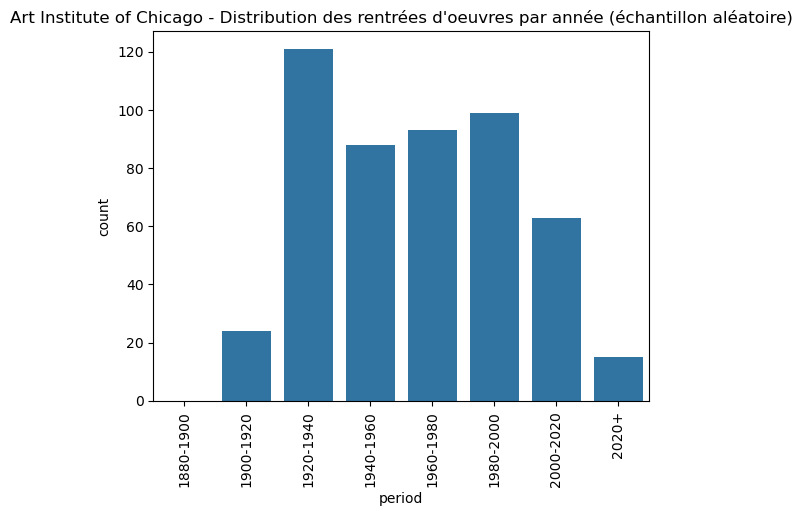

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('data_out\\random_artworks_1000_transformed.csv')

# Nombre d'oeuvres par repartition par année (sur échantillon aléatoire)
labels = ["1880-1900","1900-1920","1920-1940","1940-1960","1960-1980","1980-2000","2000-2020","2020+"]
bins = [1880, 1900,1920,1940,1960,1980,2000,2020,2040]
df['period'] = pd.cut(df['stock_year'], bins=bins, labels=labels, include_lowest=True)
sns.countplot(data=df,x='period')
plt.title("Art Institute of Chicago - Distribution des rentrées d'oeuvres par année (échantillon aléatoire)")
plt.xticks(rotation=90)
plt.show()



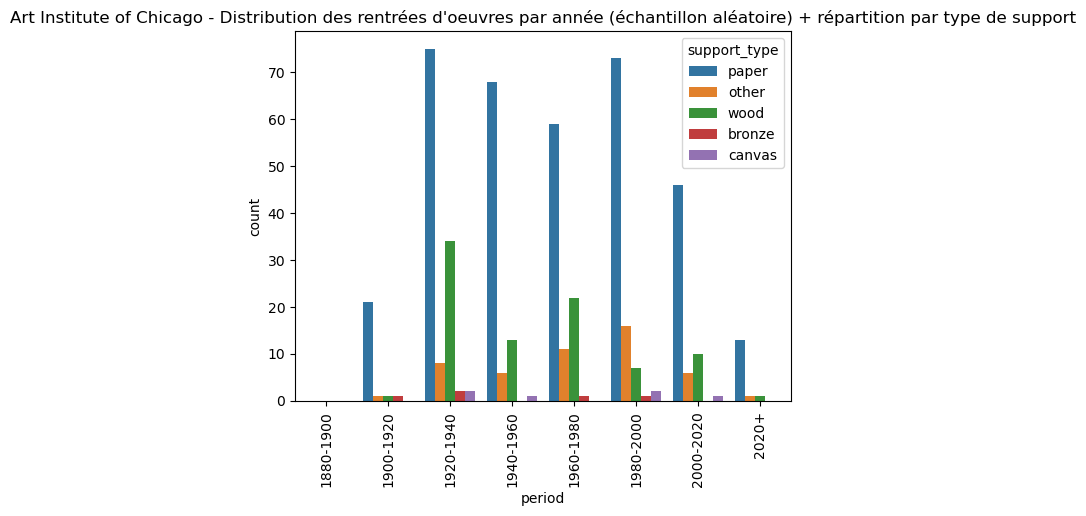

In [69]:
# Nombre d'oeuvres par repartition des entrées stock par période de 20 années (sur échantillon aléatoire)
labels = ["1880-1900","1900-1920","1920-1940","1940-1960","1960-1980","1980-2000","2000-2020","2020+"]
bins = [1880, 1900,1920,1940,1960,1980,2000,2020,2040]
df['period'] = pd.cut(df['stock_year'], bins=bins, labels=labels, include_lowest=True)
sns.countplot(data=df,x='period',hue='support_type')
plt.title("Art Institute of Chicago - Distribution des rentrées d'oeuvres par année (échantillon aléatoire) + répartition par type de support")
plt.xticks(rotation=90)
plt.show()

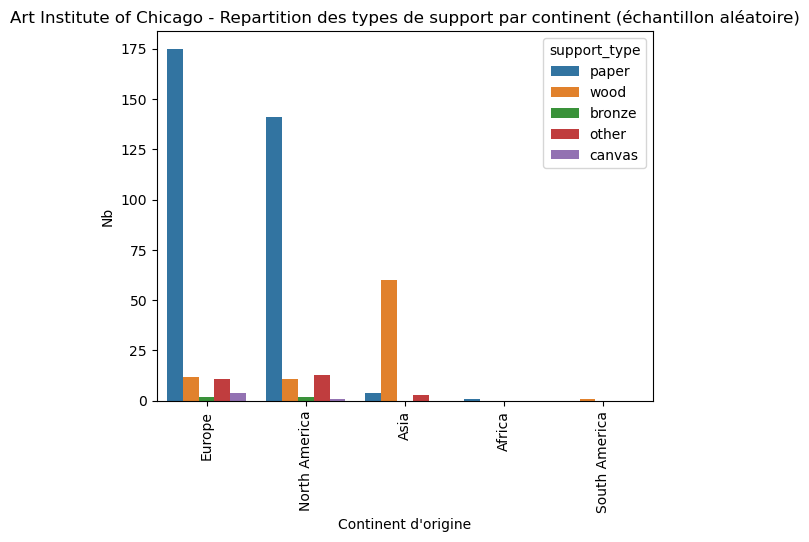

In [133]:
# Repartition des types de support par continent
df_agg = df[df['continent']!='Other']

sns.countplot(df_agg, x='continent', hue='support_type')
plt.title("Art Institute of Chicago - Repartition des types de support par continent (échantillon aléatoire)")
plt.xlabel("Continent d'origine")
plt.ylabel("Nb")
plt.xticks(rotation=90)
plt.show()

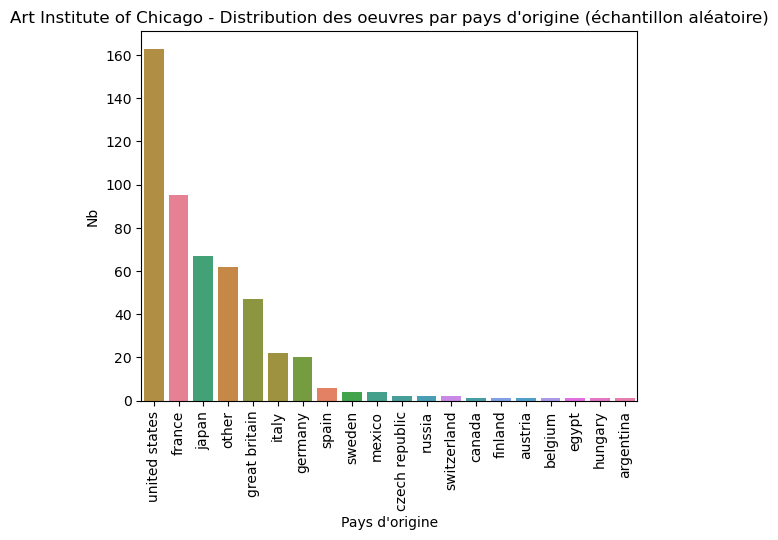

In [78]:
# Nombre d'oeuvres par pays d'origine
sns.countplot(data=df,x='country',order = df['country'].value_counts().index,orient='y',hue='country')
plt.title("Art Institute of Chicago - Nombre d'oeuvres par pays d'origine (échantillon aléatoire)")
plt.xlabel("Pays d'origine")
plt.ylabel("Nb")
plt.xticks(rotation=90)
plt.show()

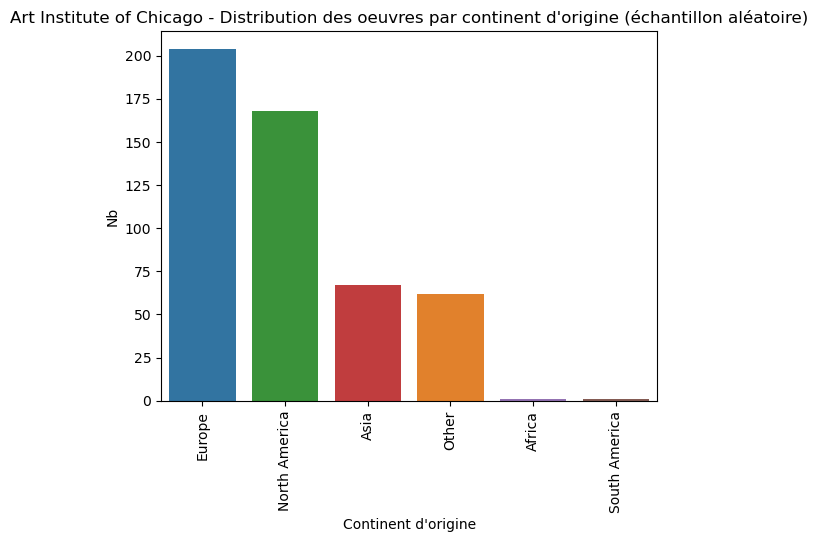

In [79]:
# Nombre d'oeuvres par continent d'origine
sns.countplot(data=df,x='continent',order = df['continent'].value_counts().index,hue='continent')
plt.title("Art Institute of Chicago - Nombre d'oeuvres par continent d'origine (échantillon aléatoire)")
plt.xlabel("Continent d'origine")
plt.ylabel("Nb")
plt.xticks(rotation=90)
plt.show()

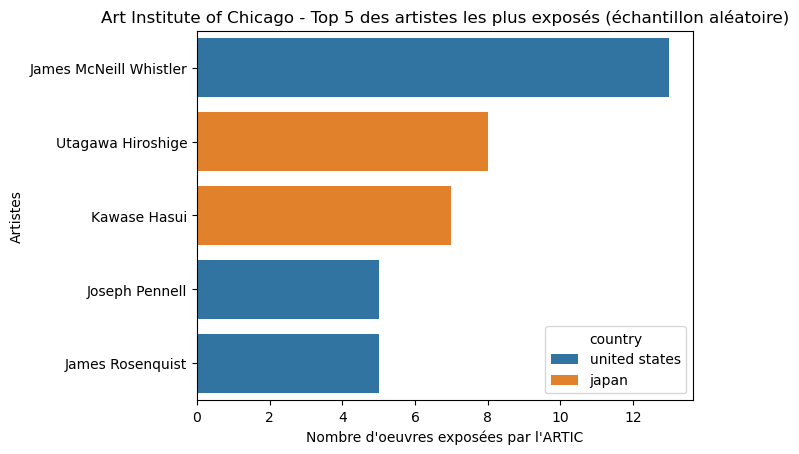

In [98]:
# Top 5 des artistes qui ont le plus d'oeuvres au Art Institute of Chicago 
df_agg_top_5 = df.groupby(['artist_title','country'])['id'].agg('count').reset_index().sort_values('id',ascending=False)[:5]
sns.barplot(data=df_agg_top_5,x='id',y='artist_title',hue='country')
plt.title("Art Institute of Chicago - Top 5 des artistes les plus exposés (échantillon aléatoire)")
plt.xlabel("Nombre d'oeuvres exposées par l'ARTIC")
plt.ylabel("Artistes")
plt.show()


## Exportation dataframe vers une base SQLite3 (en mémoire vive ou fichier)
- Export dataframe vers table SQLite3
- Requête SQL sur la table et affichage du résultat

In [158]:
import sqlite3

################################################################################################
# fonction pour exporter dataframe vers une table d'une base sqlite en RAM
# paramètres
# df = dataframe
def load_dataframe_to_sqlite_ram(df):
    conn = sqlite3.connect(':memory:')
    df.to_sql('artic_artworks', conn, index=False, if_exists='replace')
    return conn
    

################################################################################################
# fonction pour exporter dataframe vers une table d'une base sqlite en local
# paramètres
# df = dataframe
def load_dataframe_to_sqlite_db(df):
    conn = sqlite3.connect('data_out\\artic_artworks.sqlite')
    df.to_sql('artic_artworks', conn, index=False, if_exists='replace')
    conn.close()
    
    
################################################################################################
# fonction pour executer une requete sql sur la base sqlite et afficher le résultat
# paramètres
# conn = object de connexion à la base
# request = requête SQL sous forme de chaine de caractères
def sql_request_print(conn,request):
    # Créer un curseur
    cursor = conn.cursor()
    
    # Exécuter la requête SQL avec RANK()
    cursor.execute(request)
    
    # Afficher les résultats
    resultats = cursor.fetchall()
    for row in resultats:
        print(row)


In [164]:
connRAM = load_dataframe_to_sqlite_ram(df_transformed)
rqt = '''
    SELECT artist_title, COUNT(id) AS count_artworks
    FROM artic_artworks
    GROUP BY artist_title
    ORDER BY count_artworks DESC
    LIMIT 5;
    '''
sql_request_print(connRAM, rqt)


('James McNeill Whistler', 13)
('Utagawa Hiroshige', 8)
('Kawase Hasui', 7)
('Joseph Pennell', 5)
('James Rosenquist', 5)


## Pipeline complet ETL
- Récupération des données par l'API
- Stockage en dataframe
- Nettoyage des données
- Transformation des données
- Exportation vers fichier SQLite3

In [156]:
def start_pipeline_etl(n):
    print("Extraction API")
    df_etl = get_n_random_artwork(n,False,False,False,False)
    print("\nClean data")
    df_etl = clean_data(df_etl)
    print("Transform data")
    df_etl = transform_data(df_etl,False)
    print("Save data in db sqlite")
    load_dataframe_to_sqlite_db(df_etl)

start_pipeline_etl(5)


Extraction API
Extraction API oeuvre 5/5
Clean data
Transform data
Save data in db sqlite


C:\Users\Raging\AppData\Local\Temp\ipykernel_9112\1425453969.py:63: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[:,'country'].loc[~df.loc[:,'country'].isin(countries_list)] = "other"
C:\Users\Raging\AppData\Local\Temp\ipykernel_9112\